# Load in dataset
A dataset was created in Create_dataset_for_training_MS2Query_model.ipynb. This dataset contains 4 dataframes with the scores for the top 2000 matches for each query spectrum in a validation and a training set. The scores are pasted after each other, so it can be used directly for training MS2Query models. 

In [1]:
from ms2query.utils import load_pickled_file
training_scores, training_labels, validation_scores, validation_labels = \
    load_pickled_file("../downloads/gnps_210409/train_ms2query_model/ms2q_training_data.pickle")

# Data exploration
It is important to use a dataset that trains recognizing high scores as well as recognizing low scores. Here the top 2000 highest MS2deepscore scores are selected. However since most tanimoto scores are selected in this way, the network is still trained mostly for low tanimoto scores.

(array([ 455083., 1079553., 1359605., 1151687.,  758485.,  567056.,
         263886.,  219469.,  269733.,  325443.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

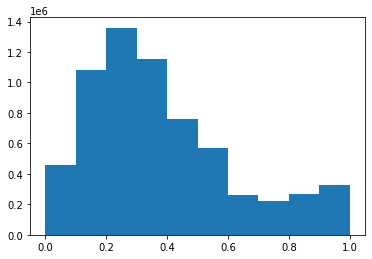

In [29]:
from matplotlib import pyplot as plt
plt.hist(training_labels)

In [25]:
import pandas as pd
def select_less_top_spectra(nr_of_spectra_cut_off, dataframe_with_tanimoto_scores, dataframe_with_scores):
    nr_of_matches_per_training_spectra = 2000
    
    tanimoto_df_per_spectrum = []
    scores_df_per_spectrum = []
    for i in range(0, len(dataframe_with_scores), nr_of_matches_per_training_spectra):
        scores_for_one_spectrum = dataframe_with_scores.iloc[i:i+nr_of_spectra_cut_off]
        tanimoto_scores_one_spectrum = dataframe_with_tanimoto_scores.iloc[i:i+nr_of_spectra_cut_off]
        tanimoto_df_per_spectrum.append(tanimoto_scores_one_spectrum)
        scores_df_per_spectrum.append(scores_for_one_spectrum)
        
    selected_tanimoto_scores = pd.concat(tanimoto_df_per_spectrum)
    selected_scores = pd.concat(scores_df_per_spectrum)
    
    return selected_tanimoto_scores, selected_scores

# Select the top 100
The top 100 spectra are selected, to get a bit better distribution of tanimoto scores in training data 

(array([20310., 46306., 59612., 51393., 35768., 27296., 15609., 15437.,
        18540., 32229.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

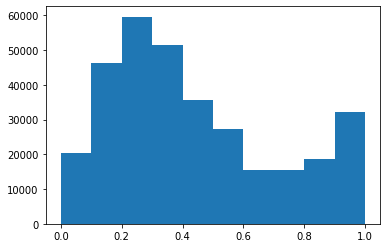

In [30]:
training_labels_top_100, training_scores_top_100 = select_less_top_spectra(100, training_labels, training_scores)
validation_labels_top_100, validation_scores_top_100 = select_less_top_spectra(100, validation_labels, validation_scores)

plt.hist(training_labels_top_100)

# Train MS2Query model

### Train model with all score

In [33]:
from ms2query.train_ms2query_nn import create_and_train_ms2query_nn
create_and_train_ms2query_nn(training_scores_top_100, training_labels_top_100, \
                             validation_scores_top_100, validation_labels_top_100, [48,48,1],\
                             save_name = "../downloads/gnps_210409/train_ms2query_model/ms2query_model_all_scores")

Epoch 1/100
20157/20157 [==============================] - 24s 1ms/step - loss: 0.0342 - mae: 0.1426 - val_loss: 0.0299 - val_mae: 0.1324

Epoch 00001: val_loss improved from inf to 0.02989, saving model to ../downloads/gnps_210409/train_ms2query_model\ms2query_model_all_scores.hdf5
Epoch 2/100
20157/20157 [==============================] - 13s 650us/step - loss: 0.0293 - mae: 0.1294 - val_loss: 0.0291 - val_mae: 0.1297

Epoch 00002: val_loss improved from 0.02989 to 0.02908, saving model to ../downloads/gnps_210409/train_ms2query_model\ms2query_model_all_scores.hdf5
Epoch 3/100
20157/20157 [==============================] - 13s 646us/step - loss: 0.0284 - mae: 0.1267 - val_loss: 0.0283 - val_mae: 0.1272

Epoch 00003: val_loss improved from 0.02908 to 0.02827, saving model to ../downloads/gnps_210409/train_ms2query_model\ms2query_model_all_scores.hdf5
Epoch 4/100
20157/20157 [==============================] - 13s 644us/step - loss: 0.0281 - mae: 0.1259 - val_loss: 0.0297 - val_mae: 0.1


Epoch 00036: val_loss did not improve from 0.02586
Epoch 37/100
20157/20157 [==============================] - 13s 641us/step - loss: 0.0244 - mae: 0.1162 - val_loss: 0.0260 - val_mae: 0.1199

Epoch 00037: val_loss did not improve from 0.02586
Epoch 38/100
20157/20157 [==============================] - 13s 657us/step - loss: 0.0243 - mae: 0.1163 - val_loss: 0.0269 - val_mae: 0.1224

Epoch 00038: val_loss did not improve from 0.02586
Epoch 39/100
20157/20157 [==============================] - 13s 656us/step - loss: 0.0243 - mae: 0.1161 - val_loss: 0.0259 - val_mae: 0.1204

Epoch 00039: val_loss did not improve from 0.02586
Epoch 40/100
20157/20157 [==============================] - 13s 657us/step - loss: 0.0243 - mae: 0.1162 - val_loss: 0.0258 - val_mae: 0.1220

Epoch 00040: val_loss improved from 0.02586 to 0.02582, saving model to ../downloads/gnps_210409/train_ms2query_model\ms2query_model_all_scores.hdf5
Epoch 41/100
20157/20157 [==============================] - 14s 684us/step - l

(<tensorflow.python.keras.engine.sequential.Sequential at 0x2362fc31820>,
 {'loss': [0.031496305018663406,
   0.02897644229233265,
   0.028264440596103668,
   0.027927471324801445,
   0.027639517560601234,
   0.027369525283575058,
   0.02715250663459301,
   0.027000227943062782,
   0.02679959498345852,
   0.02651801146566868,
   0.02633279375731945,
   0.02611823007464409,
   0.025944558903574944,
   0.025843774899840355,
   0.025710176676511765,
   0.025606919080018997,
   0.025482570752501488,
   0.025425130501389503,
   0.025325879454612732,
   0.025274762883782387,
   0.02519717626273632,
   0.025126438587903976,
   0.025033285841345787,
   0.02500300481915474,
   0.024940233677625656,
   0.02493630349636078,
   0.02482735365629196,
   0.024790585041046143,
   0.02474038675427437,
   0.024725740775465965,
   0.024685680866241455,
   0.024652373045682907,
   0.024575894698500633,
   0.02452464960515499,
   0.024465490132570267,
   0.024401040747761726,
   0.0243966244161129,
   0.02

# Test quality of matches

Import files

In [1]:
from ms2query.ms2library import MS2Library


validation_spectra_file = "../downloads/gnps_210409/spectra/ALL_GNPS_210409_val_split.pickle"


sqlite_file =  "../downloads/gnps_210409/spectra/ALL_GNPS_210409_train_split.sqlite"

# Models
s2v_model_file = "../downloads/gnps_210409/models/ALL_GNPS_210409_Spec2Vec_ms2query.model"
ms2ds_model_file = "../downloads/gnps_210409/models/ms2ds_20210420-141937_data210409_10k_500_500_200.hdf5"

# Embeddings
s2v_embeddings_file =  "../downloads/gnps_210409/embeddings/s2v_embeddings_train_spectra_210426.pickle"
ms2ds_embeddings_file =  "../downloads/gnps_210409/embeddings/ms2ds_embeddings_train_spectra_210426.pickle"


### Split validation spectra into spectra with library matches and spectra without library matches
The validation spectra contain 2299 spectra (of 250 inchikeys) that do not have any match in the library and 2000 spectra that have at least one match in the library. 

In [3]:
from ms2query.utils import load_pickled_file

validation_spectra = load_pickled_file(validation_spectra_file)
validation_spectra_without_match = validation_spectra[:2299]
# validation_spectra_with_match = validation_spectra[2299:]

Get matches for validation spectra without match

In [5]:
ms2query_model = "../downloads/gnps_210409/train_ms2query_model/ms2query_model_all_scores.hdf5"
ms2library = MS2Library(sqlite_file, s2v_model_file, ms2ds_model_file, s2v_embeddings_file, ms2ds_embeddings_file)
print("Calculating all MS2DS scores")

result = ms2library.select_best_matches(validation_spectra_without_match, ms2query_model, preselection_cut_off = 2000)
import pickle
pickle.dump(result, open("../downloads/gnps_210409/train_ms2query_model/results_with_match_all_scores.pickle", "wb"))

Calculating all MS2DS scores


collecting matches info:   0%|▎                                                                                                                                | 5/2299 [00:14<1:27:55,  2.30s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.01%.


collecting matches info:   1%|▋                                                                                                                               | 13/2299 [00:28<1:10:05,  1.84s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.57%.


collecting matches info:   3%|███▊                                                                                                                            | 68/2299 [02:08<1:08:02,  1.83s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.33%.


collecting matches info:   3%|███▉                                                                                                                            | 70/2299 [02:12<1:07:30,  1.82s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.32%.


collecting matches info:   3%|████▎                                                                                                                           | 77/2299 [02:25<1:07:29,  1.82s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.59%.


collecting matches info:   3%|████▎                                                                                                                           | 78/2299 [02:27<1:07:19,  1.82s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.44%.


collecting matches info:   4%|█████▏                                                                                                                          | 93/2299 [02:53<1:06:06,  1.80s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.87%.


collecting matches info:   4%|█████▋                                                                                                                         | 102/2299 [03:10<1:06:47,  1.82s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.53%.


collecting matches info:   4%|█████▋                                                                                                                         | 103/2299 [03:12<1:06:30,  1.82s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.10%.


collecting matches info:   5%|█████▊                                                                                                                         | 105/2299 [03:15<1:05:48,  1.80s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.11%.


collecting matches info:   6%|███████▍                                                                                                                       | 135/2299 [04:09<1:04:32,  1.79s/it]

Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.47%.


collecting matches info:   6%|████████                                                                                                                       | 146/2299 [04:29<1:03:55,  1.78s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.43%.


collecting matches info:   6%|████████                                                                                                                       | 147/2299 [04:30<1:04:18,  1.79s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.45%.


collecting matches info:   7%|█████████▏                                                                                                                     | 167/2299 [05:07<1:04:07,  1.80s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.58%.


collecting matches info:   7%|█████████▎                                                                                                                     | 168/2299 [05:08<1:04:10,  1.81s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.28%.


collecting matches info:   7%|█████████▍                                                                                                                     | 171/2299 [05:14<1:03:51,  1.80s/it]

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.47%.


collecting matches info:   9%|███████████▍                                                                                                                   | 207/2299 [06:19<1:03:59,  1.84s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.39%.


collecting matches info:   9%|███████████▊                                                                                                                   | 213/2299 [06:31<1:07:02,  1.93s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.24%.


collecting matches info:   9%|███████████▉                                                                                                                   | 217/2299 [06:38<1:03:22,  1.83s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.59%.


collecting matches info:  10%|████████████▋                                                                                                                  | 229/2299 [06:59<1:01:44,  1.79s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.92%.


collecting matches info:  12%|███████████████▋                                                                                                               | 284/2299 [22:27<2:13:17,  3.97s/it]

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.48%.


collecting matches info:  12%|███████████████▋                                                                                                               | 285/2299 [22:29<1:51:12,  3.31s/it]

Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.36%.


collecting matches info:  12%|███████████████▊                                                                                                               | 287/2299 [22:33<1:24:52,  2.53s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.67%.


collecting matches info:  13%|███████████████▉                                                                                                               | 288/2299 [22:34<1:17:13,  2.30s/it]

Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.80%.


collecting matches info:  13%|███████████████▉                                                                                                               | 289/2299 [22:36<1:12:01,  2.15s/it]

Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.16%.


collecting matches info:  13%|████████████████▎                                                                                                              | 295/2299 [22:47<1:01:21,  1.84s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.06%.


collecting matches info:  13%|████████████████▍                                                                                                              | 297/2299 [22:51<1:00:16,  1.81s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.35%.


collecting matches info:  13%|████████████████▊                                                                                                              | 305/2299 [23:09<1:19:11,  2.38s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.55%.


collecting matches info:  14%|█████████████████▌                                                                                                             | 317/2299 [23:35<1:04:34,  1.95s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.61%.


collecting matches info:  14%|█████████████████▌                                                                                                             | 318/2299 [23:37<1:02:34,  1.90s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.61%.


collecting matches info:  14%|█████████████████▌                                                                                                             | 319/2299 [23:38<1:01:34,  1.87s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.48%.


collecting matches info:  15%|███████████████████▌                                                                                                             | 349/2299 [24:34<58:56,  1.81s/it]

Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.63%.


collecting matches info:  15%|███████████████████▋                                                                                                             | 350/2299 [24:35<59:10,  1.82s/it]

Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.22%.


collecting matches info:  15%|███████████████████▍                                                                                                           | 352/2299 [24:39<1:00:40,  1.87s/it]

Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.11%.


collecting matches info:  15%|███████████████████▌                                                                                                           | 353/2299 [24:41<1:00:23,  1.86s/it]

Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.04%.


collecting matches info:  16%|███████████████████▋                                                                                                           | 357/2299 [24:49<1:00:01,  1.85s/it]

Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.93%.


collecting matches info:  16%|████████████████████                                                                                                             | 358/2299 [24:50<59:46,  1.85s/it]

Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.06%.


collecting matches info:  16%|████████████████████▎                                                                                                            | 362/2299 [24:58<59:04,  1.83s/it]

Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.80%.


collecting matches info:  16%|████████████████████▎                                                                                                            | 363/2299 [25:00<59:27,  1.84s/it]

Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.28%.


collecting matches info:  16%|████████████████████▌                                                                                                            | 366/2299 [25:05<59:24,  1.84s/it]

Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.22%.


collecting matches info:  16%|████████████████████▌                                                                                                            | 367/2299 [25:07<59:07,  1.84s/it]

Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.08%.


collecting matches info:  16%|████████████████████▋                                                                                                            | 368/2299 [25:09<59:07,  1.84s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.88%.


collecting matches info:  16%|████████████████████▋                                                                                                            | 369/2299 [25:11<58:52,  1.83s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.00%.


collecting matches info:  16%|████████████████████▊                                                                                                            | 370/2299 [25:12<58:46,  1.83s/it]

Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.68%.


collecting matches info:  16%|████████████████████▊                                                                                                            | 371/2299 [25:14<58:53,  1.83s/it]

Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.24%.


collecting matches info:  16%|████████████████████▊                                                                                                            | 372/2299 [25:16<58:43,  1.83s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.25%.


collecting matches info:  16%|████████████████████▉                                                                                                            | 373/2299 [25:18<58:44,  1.83s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.26%.


collecting matches info:  17%|█████████████████████▋                                                                                                           | 386/2299 [25:42<59:48,  1.88s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.08%.


collecting matches info:  17%|█████████████████████▍                                                                                                         | 389/2299 [25:50<1:18:23,  2.46s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.65%.


collecting matches info:  18%|██████████████████████▋                                                                                                          | 404/2299 [26:19<59:03,  1.87s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.89%.


collecting matches info:  18%|██████████████████████▊                                                                                                        | 414/2299 [26:45<1:58:29,  3.77s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.18%.


collecting matches info:  18%|██████████████████████▉                                                                                                        | 416/2299 [26:55<2:22:47,  4.55s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.63%.


collecting matches info:  18%|███████████████████████▍                                                                                                       | 424/2299 [27:38<2:45:02,  5.28s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.47%.


collecting matches info:  19%|███████████████████████▌                                                                                                       | 426/2299 [27:49<2:44:46,  5.28s/it]

Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.57%.


collecting matches info:  19%|███████████████████████▋                                                                                                       | 428/2299 [27:59<2:45:56,  5.32s/it]

Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.30%.


collecting matches info:  19%|███████████████████████▊                                                                                                       | 430/2299 [28:10<2:45:22,  5.31s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.52%.


collecting matches info:  20%|██████████████████████████▏                                                                                                      | 466/2299 [30:06<57:33,  1.88s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.19%.


collecting matches info:  20%|██████████████████████████▏                                                                                                      | 467/2299 [30:08<56:56,  1.86s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.51%.


collecting matches info:  21%|██████████████████████████▌                                                                                                      | 473/2299 [30:19<55:54,  1.84s/it]

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.03%.


collecting matches info:  21%|██████████████████████████▌                                                                                                      | 474/2299 [30:21<56:16,  1.85s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.36%.


collecting matches info:  21%|███████████████████████████                                                                                                      | 482/2299 [30:36<56:27,  1.86s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.63%.


collecting matches info:  21%|███████████████████████████▏                                                                                                     | 484/2299 [30:39<57:12,  1.89s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.17%.


collecting matches info:  21%|███████████████████████████▎                                                                                                     | 486/2299 [30:43<57:14,  1.89s/it]

Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.58%.


collecting matches info:  21%|███████████████████████████▎                                                                                                     | 487/2299 [30:45<57:29,  1.90s/it]

Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.79%.


collecting matches info:  21%|███████████████████████████▍                                                                                                     | 488/2299 [30:47<57:58,  1.92s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.34%.


collecting matches info:  21%|███████████████████████████▍                                                                                                     | 489/2299 [30:49<58:25,  1.94s/it]

Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.23%.


collecting matches info:  21%|███████████████████████████▍                                                                                                     | 490/2299 [30:51<57:56,  1.92s/it]

Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.13%.


collecting matches info:  21%|███████████████████████████▌                                                                                                     | 491/2299 [30:53<57:54,  1.92s/it]

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.52%.


collecting matches info:  21%|███████████████████████████▌                                                                                                     | 492/2299 [30:55<58:26,  1.94s/it]

Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.07%.


collecting matches info:  21%|███████████████████████████▋                                                                                                     | 493/2299 [30:57<57:56,  1.93s/it]

Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.13%.


collecting matches info:  21%|███████████████████████████▋                                                                                                     | 494/2299 [30:59<57:59,  1.93s/it]

Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.68%.


collecting matches info:  22%|███████████████████████████▉                                                                                                     | 499/2299 [31:08<57:00,  1.90s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.39%.


collecting matches info:  22%|████████████████████████████▎                                                                                                    | 505/2299 [31:20<56:24,  1.89s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.72%.


collecting matches info:  22%|████████████████████████████▋                                                                                                    | 512/2299 [31:33<56:36,  1.90s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.78%.


collecting matches info:  22%|████████████████████████████▊                                                                                                    | 513/2299 [31:35<57:06,  1.92s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.75%.


collecting matches info:  22%|█████████████████████████████                                                                                                    | 517/2299 [31:43<57:08,  1.92s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.93%.


collecting matches info:  25%|███████████████████████████████▋                                                                                                 | 565/2299 [33:14<54:12,  1.88s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.79%.


collecting matches info:  25%|███████████████████████████████▊                                                                                                 | 566/2299 [33:16<54:46,  1.90s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.69%.


collecting matches info:  25%|███████████████████████████████▊                                                                                                 | 567/2299 [33:17<54:44,  1.90s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.66%.


collecting matches info:  25%|████████████████████████████████                                                                                                 | 571/2299 [33:25<55:37,  1.93s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.56%.


collecting matches info:  25%|████████████████████████████████▎                                                                                                | 576/2299 [33:35<54:08,  1.89s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.90%.


collecting matches info:  25%|████████████████████████████████▉                                                                                                | 586/2299 [33:53<53:36,  1.88s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.77%.


collecting matches info:  26%|█████████████████████████████████▌                                                                                               | 598/2299 [34:15<51:54,  1.83s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.69%.


collecting matches info:  26%|█████████████████████████████████▌                                                                                               | 599/2299 [34:17<51:46,  1.83s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.88%.


collecting matches info:  26%|██████████████████████████████████                                                                                               | 608/2299 [34:34<52:20,  1.86s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.06%.


collecting matches info:  27%|██████████████████████████████████▌                                                                                              | 617/2299 [34:51<51:33,  1.84s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.85%.


collecting matches info:  27%|██████████████████████████████████▊                                                                                              | 620/2299 [34:56<51:54,  1.85s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.82%.


collecting matches info:  27%|██████████████████████████████████▉                                                                                              | 623/2299 [35:02<52:21,  1.87s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.80%.


collecting matches info:  27%|███████████████████████████████████▎                                                                                             | 630/2299 [35:15<53:05,  1.91s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.97%.


collecting matches info:  27%|███████████████████████████████████▍                                                                                             | 632/2299 [35:19<52:37,  1.89s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.80%.


collecting matches info:  28%|████████████████████████████████████▏                                                                                            | 644/2299 [35:42<52:41,  1.91s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.78%.


collecting matches info:  28%|████████████████████████████████████▏                                                                                            | 646/2299 [35:46<53:05,  1.93s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.64%.


collecting matches info:  29%|████████████████████████████████████▉                                                                                            | 658/2299 [36:08<51:11,  1.87s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.97%.


collecting matches info:  29%|█████████████████████████████████████                                                                                            | 660/2299 [36:12<50:41,  1.86s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.94%.


collecting matches info:  29%|█████████████████████████████████████▏                                                                                           | 663/2299 [36:18<51:17,  1.88s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.79%.


collecting matches info:  29%|█████████████████████████████████████▍                                                                                           | 668/2299 [36:27<50:55,  1.87s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.35%.


collecting matches info:  29%|█████████████████████████████████████▊                                                                                           | 673/2299 [36:36<49:48,  1.84s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.88%.


collecting matches info:  29%|█████████████████████████████████████▉                                                                                           | 677/2299 [36:44<51:49,  1.92s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.64%.


collecting matches info:  30%|██████████████████████████████████████▎                                                                                          | 682/2299 [36:53<50:09,  1.86s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.00%.


collecting matches info:  30%|██████████████████████████████████████▍                                                                                          | 684/2299 [36:57<51:32,  1.91s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.88%.


collecting matches info:  30%|██████████████████████████████████████▌                                                                                          | 687/2299 [37:03<51:07,  1.90s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.08%.


collecting matches info:  30%|██████████████████████████████████████▊                                                                                          | 692/2299 [37:12<50:32,  1.89s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.83%.


collecting matches info:  30%|███████████████████████████████████████                                                                                          | 696/2299 [37:20<50:10,  1.88s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.09%.


collecting matches info:  31%|███████████████████████████████████████▍                                                                                         | 702/2299 [37:31<50:28,  1.90s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.67%.


collecting matches info:  31%|███████████████████████████████████████▌                                                                                         | 706/2299 [37:39<50:03,  1.89s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.76%.


collecting matches info:  31%|███████████████████████████████████████▊                                                                                         | 709/2299 [37:44<50:17,  1.90s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.82%.


collecting matches info:  31%|████████████████████████████████████████▎                                                                                        | 719/2299 [38:03<49:39,  1.89s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.93%.


collecting matches info:  33%|██████████████████████████████████████████▉                                                                                      | 766/2299 [39:32<47:42,  1.87s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.82%.


collecting matches info:  33%|███████████████████████████████████████████                                                                                      | 768/2299 [39:36<47:36,  1.87s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.78%.


collecting matches info:  34%|███████████████████████████████████████████▎                                                                                     | 772/2299 [39:44<49:31,  1.95s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.00%.


collecting matches info:  34%|███████████████████████████████████████████▌                                                                                     | 776/2299 [39:51<48:30,  1.91s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.51%.


collecting matches info:  34%|███████████████████████████████████████████▋                                                                                     | 779/2299 [39:57<47:31,  1.88s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.49%.


collecting matches info:  34%|███████████████████████████████████████████▉                                                                                     | 783/2299 [40:04<46:53,  1.86s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.15%.


collecting matches info:  34%|███████████████████████████████████████████▉                                                                                     | 784/2299 [40:06<46:53,  1.86s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.96%.


collecting matches info:  34%|████████████████████████████████████████████                                                                                     | 785/2299 [40:08<46:58,  1.86s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.55%.


collecting matches info:  34%|████████████████████████████████████████████                                                                                     | 786/2299 [40:10<47:09,  1.87s/it]

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.69%.


collecting matches info:  34%|████████████████████████████████████████████▍                                                                                    | 791/2299 [40:19<47:09,  1.88s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.82%.


collecting matches info:  35%|████████████████████████████████████████████▋                                                                                    | 797/2299 [40:31<47:18,  1.89s/it]

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.33%.


collecting matches info:  35%|█████████████████████████████████████████████▎                                                                                   | 807/2299 [40:49<47:17,  1.90s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.55%.


collecting matches info:  35%|█████████████████████████████████████████████▋                                                                                   | 814/2299 [41:04<52:55,  2.14s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.14%.


collecting matches info:  35%|█████████████████████████████████████████████▋                                                                                   | 815/2299 [41:06<50:32,  2.04s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.45%.


collecting matches info:  35%|█████████████████████████████████████████████▊                                                                                   | 816/2299 [41:08<48:42,  1.97s/it]

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.52%.


collecting matches info:  36%|█████████████████████████████████████████████▉                                                                                   | 819/2299 [41:14<46:30,  1.89s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.23%.


collecting matches info:  36%|██████████████████████████████████████████████                                                                                   | 821/2299 [41:17<45:34,  1.85s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.89%.


collecting matches info:  36%|██████████████████████████████████████████████▎                                                                                  | 825/2299 [41:24<44:47,  1.82s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.69%.


collecting matches info:  36%|██████████████████████████████████████████████▎                                                                                  | 826/2299 [41:26<45:10,  1.84s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.90%.


collecting matches info:  36%|██████████████████████████████████████████████▌                                                                                  | 829/2299 [41:32<45:59,  1.88s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.64%.


collecting matches info:  36%|██████████████████████████████████████████████▋                                                                                  | 831/2299 [41:36<45:27,  1.86s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.03%.


collecting matches info:  36%|██████████████████████████████████████████████▋                                                                                  | 832/2299 [41:38<45:09,  1.85s/it]

Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.38%.


collecting matches info:  36%|███████████████████████████████████████████████                                                                                  | 838/2299 [41:48<44:29,  1.83s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.70%.


collecting matches info:  37%|███████████████████████████████████████████████▏                                                                                 | 840/2299 [41:52<45:03,  1.85s/it]

Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.34%.


collecting matches info:  37%|███████████████████████████████████████████████▎                                                                                 | 843/2299 [41:58<44:30,  1.83s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.70%.


collecting matches info:  37%|███████████████████████████████████████████████▎                                                                                 | 844/2299 [42:00<44:59,  1.86s/it]

Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.03%.


collecting matches info:  37%|███████████████████████████████████████████████▍                                                                                 | 846/2299 [42:03<44:41,  1.85s/it]

Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.35%.


collecting matches info:  37%|███████████████████████████████████████████████▋                                                                                 | 849/2299 [42:09<44:39,  1.85s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.99%.


collecting matches info:  37%|███████████████████████████████████████████████▊                                                                                 | 853/2299 [42:17<47:51,  1.99s/it]

Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.34%.


collecting matches info:  38%|████████████████████████████████████████████████▍                                                                                | 863/2299 [42:37<46:20,  1.94s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.84%.


collecting matches info:  39%|█████████████████████████████████████████████████▊                                                                               | 888/2299 [43:27<46:47,  1.99s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.39%.


collecting matches info:  39%|█████████████████████████████████████████████████▉                                                                               | 889/2299 [43:29<46:19,  1.97s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.40%.


collecting matches info:  39%|█████████████████████████████████████████████████▉                                                                               | 890/2299 [43:31<45:35,  1.94s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.43%.


collecting matches info:  39%|██████████████████████████████████████████████████▊                                                                              | 905/2299 [43:59<43:05,  1.85s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.38%.


collecting matches info:  39%|██████████████████████████████████████████████████▉                                                                              | 907/2299 [44:03<43:20,  1.87s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.39%.


collecting matches info:  40%|███████████████████████████████████████████████████                                                                              | 910/2299 [44:09<43:36,  1.88s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.57%.


collecting matches info:  40%|███████████████████████████████████████████████████▏                                                                             | 912/2299 [44:13<43:09,  1.87s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.64%.


collecting matches info:  40%|███████████████████████████████████████████████████▍                                                                             | 917/2299 [44:22<44:27,  1.93s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.45%.


collecting matches info:  40%|███████████████████████████████████████████████████▌                                                                             | 918/2299 [44:24<44:15,  1.92s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.55%.


collecting matches info:  40%|███████████████████████████████████████████████████▌                                                                             | 920/2299 [44:28<44:23,  1.93s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.67%.


collecting matches info:  40%|████████████████████████████████████████████████████                                                                             | 927/2299 [44:42<44:51,  1.96s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.20%.


collecting matches info:  41%|████████████████████████████████████████████████████▋                                                                            | 938/2299 [45:06<45:03,  1.99s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.81%.


collecting matches info:  41%|█████████████████████████████████████████████████████▎                                                                           | 951/2299 [45:31<41:59,  1.87s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.90%.


collecting matches info:  41%|█████████████████████████████████████████████████████▍                                                                           | 952/2299 [45:33<41:44,  1.86s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.89%.


collecting matches info:  41%|█████████████████████████████████████████████████████▍                                                                           | 953/2299 [45:35<41:33,  1.85s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.85%.


collecting matches info:  41%|█████████████████████████████████████████████████████▌                                                                           | 954/2299 [45:37<41:25,  1.85s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.15%.


collecting matches info:  42%|█████████████████████████████████████████████████████▉                                                                           | 962/2299 [45:52<42:17,  1.90s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.23%.


collecting matches info:  42%|██████████████████████████████████████████████████████▌                                                                          | 973/2299 [46:13<42:01,  1.90s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.57%.


collecting matches info:  43%|███████████████████████████████████████████████████████                                                                          | 982/2299 [46:30<42:24,  1.93s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.58%.


collecting matches info:  43%|████████████████████████████████████████████████████████                                                                         | 999/2299 [47:03<43:18,  2.00s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.88%.


collecting matches info:  44%|███████████████████████████████████████████████████████▋                                                                        | 1001/2299 [47:07<42:49,  1.98s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.85%.


collecting matches info:  44%|████████████████████████████████████████████████████████▏                                                                       | 1010/2299 [47:24<41:40,  1.94s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.56%.


collecting matches info:  44%|████████████████████████████████████████████████████████▎                                                                       | 1011/2299 [47:26<42:05,  1.96s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.85%.


collecting matches info:  44%|████████████████████████████████████████████████████████▎                                                                       | 1012/2299 [47:28<42:40,  1.99s/it]

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.69%.


collecting matches info:  44%|████████████████████████████████████████████████████████▊                                                                       | 1021/2299 [47:45<40:55,  1.92s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.48%.


collecting matches info:  45%|█████████████████████████████████████████████████████████▎                                                                      | 1029/2299 [48:01<40:08,  1.90s/it]

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.10%.


collecting matches info:  45%|█████████████████████████████████████████████████████████▍                                                                      | 1031/2299 [48:04<40:39,  1.92s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.80%.


collecting matches info:  45%|█████████████████████████████████████████████████████████▌                                                                      | 1034/2299 [48:10<39:44,  1.88s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.57%.


collecting matches info:  45%|█████████████████████████████████████████████████████████▋                                                                      | 1036/2299 [48:14<39:43,  1.89s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.25%.


collecting matches info:  45%|█████████████████████████████████████████████████████████▊                                                                      | 1039/2299 [48:19<39:16,  1.87s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.18%.


collecting matches info:  45%|█████████████████████████████████████████████████████████▉                                                                      | 1040/2299 [48:22<42:50,  2.04s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.37%.


collecting matches info:  45%|██████████████████████████████████████████████████████████                                                                      | 1043/2299 [48:28<42:06,  2.01s/it]

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.90%.


collecting matches info:  45%|██████████████████████████████████████████████████████████▏                                                                     | 1045/2299 [48:32<40:43,  1.95s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.37%.


collecting matches info:  46%|██████████████████████████████████████████████████████████▎                                                                     | 1047/2299 [48:35<39:38,  1.90s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.16%.


collecting matches info:  46%|██████████████████████████████████████████████████████████▎                                                                     | 1048/2299 [48:37<39:37,  1.90s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.78%.


collecting matches info:  46%|██████████████████████████████████████████████████████████▋                                                                     | 1054/2299 [48:48<38:20,  1.85s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.58%.


collecting matches info:  46%|██████████████████████████████████████████████████████████▋                                                                     | 1055/2299 [48:50<38:22,  1.85s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.48%.


collecting matches info:  46%|██████████████████████████████████████████████████████████▊                                                                     | 1056/2299 [48:52<38:34,  1.86s/it]

Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.35%.


collecting matches info:  46%|███████████████████████████████████████████████████████████▎                                                                    | 1066/2299 [49:11<38:04,  1.85s/it]

Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.27%.


collecting matches info:  47%|████████████████████████████████████████████████████████████                                                                    | 1078/2299 [49:33<37:47,  1.86s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.03%.


collecting matches info:  47%|████████████████████████████████████████████████████████████▍                                                                   | 1086/2299 [49:48<38:13,  1.89s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.93%.


collecting matches info:  47%|████████████████████████████████████████████████████████████▋                                                                   | 1090/2299 [49:56<37:55,  1.88s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.55%.


collecting matches info:  47%|████████████████████████████████████████████████████████████▊                                                                   | 1092/2299 [50:00<38:36,  1.92s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.56%.


collecting matches info:  48%|█████████████████████████████████████████████████████████████▍                                                                  | 1103/2299 [50:20<36:55,  1.85s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.75%.


collecting matches info:  48%|█████████████████████████████████████████████████████████████▍                                                                  | 1104/2299 [50:22<37:30,  1.88s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.93%.


collecting matches info:  48%|█████████████████████████████████████████████████████████████▋                                                                  | 1109/2299 [50:32<38:00,  1.92s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.64%.


collecting matches info:  48%|██████████████████████████████████████████████████████████████                                                                  | 1114/2299 [50:41<36:50,  1.87s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.56%.


collecting matches info:  49%|██████████████████████████████████████████████████████████████▎                                                                 | 1120/2299 [50:53<37:48,  1.92s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.22%.


collecting matches info:  56%|████████████████████████████████████████████████████████████████████████▏                                                       | 1296/2299 [56:32<32:34,  1.95s/it]

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.08%.


collecting matches info:  57%|████████████████████████████████████████████████████████████████████████▋                                                       | 1305/2299 [56:55<39:53,  2.41s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.00%.


collecting matches info:  57%|████████████████████████████████████████████████████████████████████████▊                                                       | 1308/2299 [57:02<37:16,  2.26s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.92%.


collecting matches info:  57%|█████████████████████████████████████████████████████████████████████████                                                       | 1312/2299 [57:13<46:50,  2.85s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.33%.


collecting matches info:  57%|█████████████████████████████████████████████████████████████████████████▍                                                      | 1320/2299 [57:31<35:48,  2.19s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.17%.


collecting matches info:  58%|█████████████████████████████████████████████████████████████████████████▊                                                      | 1326/2299 [57:46<37:03,  2.29s/it]

Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.07%.


collecting matches info:  58%|██████████████████████████████████████████████████████████████████████████                                                      | 1331/2299 [57:56<34:40,  2.15s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.35%.


collecting matches info:  60%|████████████████████████████████████████████████████████████████████████████▏                                                   | 1368/2299 [59:08<29:20,  1.89s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.22%.


collecting matches info:  60%|████████████████████████████████████████████████████████████████████████████▍                                                   | 1374/2299 [59:19<28:54,  1.88s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.26%.


collecting matches info:  60%|████████████████████████████████████████████████████████████████████████████▉                                                   | 1381/2299 [59:32<28:58,  1.89s/it]

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.87%.


collecting matches info:  60%|█████████████████████████████████████████████████████████████████████████████                                                   | 1385/2299 [59:40<29:42,  1.95s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.30%.


collecting matches info:  61%|████████████████████████████████████████████████████████████████████████████▌                                                 | 1398/2299 [1:00:05<28:09,  1.88s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.67%.


collecting matches info:  61%|████████████████████████████████████████████████████████████████████████████▉                                                 | 1403/2299 [1:00:14<28:04,  1.88s/it]

Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.78%.


collecting matches info:  62%|██████████████████████████████████████████████████████████████████████████████                                                | 1425/2299 [1:00:56<28:06,  1.93s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.78%.


collecting matches info:  62%|██████████████████████████████████████████████████████████████████████████████▎                                               | 1428/2299 [1:01:02<28:12,  1.94s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.59%.


collecting matches info:  62%|██████████████████████████████████████████████████████████████████████████████▎                                               | 1429/2299 [1:01:04<27:52,  1.92s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.30%.


collecting matches info:  62%|██████████████████████████████████████████████████████████████████████████████▍                                               | 1431/2299 [1:01:07<27:38,  1.91s/it]

Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.23%.


collecting matches info:  63%|██████████████████████████████████████████████████████████████████████████████▉                                               | 1440/2299 [1:01:24<27:03,  1.89s/it]

Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.96%.


collecting matches info:  63%|███████████████████████████████████████████████████████████████████████████████▋                                              | 1455/2299 [1:01:53<28:00,  1.99s/it]

Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.15%.


collecting matches info:  63%|███████████████████████████████████████████████████████████████████████████████▊                                              | 1457/2299 [1:01:58<28:53,  2.06s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.32%.


collecting matches info:  64%|█████████████████████████████████████████████████████████████████████████████████                                             | 1479/2299 [1:02:39<25:02,  1.83s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.39%.


collecting matches info:  65%|█████████████████████████████████████████████████████████████████████████████████▎                                            | 1483/2299 [1:02:47<26:03,  1.92s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.38%.


collecting matches info:  65%|█████████████████████████████████████████████████████████████████████████████████▎                                            | 1484/2299 [1:02:49<26:02,  1.92s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.76%.


collecting matches info:  65%|█████████████████████████████████████████████████████████████████████████████████▍                                            | 1485/2299 [1:02:50<25:47,  1.90s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.41%.


collecting matches info:  66%|███████████████████████████████████████████████████████████████████████████████████▏                                          | 1517/2299 [1:03:51<25:04,  1.92s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.27%.


collecting matches info:  66%|███████████████████████████████████████████████████████████████████████████████████▎                                          | 1520/2299 [1:03:57<24:52,  1.92s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.52%.


collecting matches info:  66%|███████████████████████████████████████████████████████████████████████████████████▎                                          | 1521/2299 [1:03:59<24:48,  1.91s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.29%.


collecting matches info:  66%|███████████████████████████████████████████████████████████████████████████████████▍                                          | 1523/2299 [1:04:03<24:39,  1.91s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.14%.


collecting matches info:  67%|███████████████████████████████████████████████████████████████████████████████████▉                                          | 1531/2299 [1:04:18<23:53,  1.87s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.27%.


collecting matches info:  67%|████████████████████████████████████████████████████████████████████████████████████▏                                         | 1535/2299 [1:04:25<23:32,  1.85s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.99%.


collecting matches info:  68%|█████████████████████████████████████████████████████████████████████████████████████▌                                        | 1561/2299 [1:05:14<23:28,  1.91s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.38%.


collecting matches info:  69%|██████████████████████████████████████████████████████████████████████████████████████▌                                       | 1579/2299 [1:05:47<22:44,  1.90s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.02%.


collecting matches info:  70%|████████████████████████████████████████████████████████████████████████████████████████▎                                     | 1612/2299 [1:06:51<22:49,  1.99s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.23%.


collecting matches info:  72%|██████████████████████████████████████████████████████████████████████████████████████████▏                                   | 1645/2299 [1:07:54<21:23,  1.96s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.06%.


collecting matches info:  72%|██████████████████████████████████████████████████████████████████████████████████████████▎                                   | 1648/2299 [1:08:00<23:56,  2.21s/it]

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.03%.


collecting matches info:  72%|██████████████████████████████████████████████████████████████████████████████████████████▌                                   | 1652/2299 [1:08:08<22:01,  2.04s/it]

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.63%.


collecting matches info:  72%|██████████████████████████████████████████████████████████████████████████████████████████▋                                   | 1655/2299 [1:08:14<20:34,  1.92s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.26%.


collecting matches info:  72%|███████████████████████████████████████████████████████████████████████████████████████████                                   | 1662/2299 [1:08:27<20:13,  1.91s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.50%.


collecting matches info:  72%|███████████████████████████████████████████████████████████████████████████████████████████▎                                  | 1666/2299 [1:08:35<19:40,  1.86s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.94%.


collecting matches info:  73%|███████████████████████████████████████████████████████████████████████████████████████████▋                                  | 1672/2299 [1:08:46<19:20,  1.85s/it]

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.70%.


collecting matches info:  73%|███████████████████████████████████████████████████████████████████████████████████████████▊                                  | 1675/2299 [1:08:52<19:53,  1.91s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.70%.


collecting matches info:  73%|███████████████████████████████████████████████████████████████████████████████████████████▉                                  | 1678/2299 [1:08:58<20:15,  1.96s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.14%.


collecting matches info:  73%|████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 1682/2299 [1:09:06<21:01,  2.04s/it]

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.41%.


collecting matches info:  75%|██████████████████████████████████████████████████████████████████████████████████████████████▍                               | 1722/2299 [1:10:23<18:12,  1.89s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.73%.


collecting matches info:  76%|███████████████████████████████████████████████████████████████████████████████████████████████▎                              | 1739/2299 [1:10:59<19:40,  2.11s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.69%.


collecting matches info:  76%|████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 1758/2299 [1:11:37<16:46,  1.86s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.41%.


collecting matches info:  77%|████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 1761/2299 [1:11:43<16:39,  1.86s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.78%.


collecting matches info:  77%|████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 1766/2299 [1:11:52<16:21,  1.84s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.26%.


collecting matches info:  77%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 1776/2299 [1:12:11<15:59,  1.83s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.88%.


collecting matches info:  77%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 1781/2299 [1:12:20<16:06,  1.87s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.08%.


collecting matches info:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 1782/2299 [1:12:23<18:59,  2.20s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.79%.


collecting matches info:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 1785/2299 [1:12:29<17:28,  2.04s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.94%.


collecting matches info:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 1786/2299 [1:12:31<17:21,  2.03s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.47%.


collecting matches info:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████                          | 1826/2299 [1:13:49<15:08,  1.92s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.27%.


collecting matches info:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 1837/2299 [1:14:10<14:36,  1.90s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.68%.


collecting matches info:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████                         | 1843/2299 [1:14:22<14:32,  1.91s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.22%.


collecting matches info:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████                         | 1845/2299 [1:14:26<14:17,  1.89s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.15%.


collecting matches info:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 1855/2299 [1:14:47<16:56,  2.29s/it]

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.57%.


collecting matches info:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 1857/2299 [1:14:51<16:38,  2.26s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.57%.


collecting matches info:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 1861/2299 [1:15:01<16:33,  2.27s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.88%.


collecting matches info:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 1865/2299 [1:15:08<14:32,  2.01s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.52%.


collecting matches info:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 1866/2299 [1:15:10<14:12,  1.97s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.28%.


collecting matches info:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 1872/2299 [1:15:22<13:53,  1.95s/it]

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.83%.


collecting matches info:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 1989/2299 [1:19:10<10:13,  1.98s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.45%.


collecting matches info:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 2002/2299 [1:19:36<10:04,  2.04s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.40%.


collecting matches info:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 2007/2299 [1:19:48<11:35,  2.38s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.71%.


collecting matches info:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 2013/2299 [1:19:59<09:14,  1.94s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.12%.


collecting matches info:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 2026/2299 [1:20:24<08:32,  1.88s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.38%.


collecting matches info:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 2028/2299 [1:20:27<08:28,  1.88s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.38%.


collecting matches info:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 2033/2299 [1:20:37<08:11,  1.85s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.36%.


collecting matches info:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 2034/2299 [1:20:39<08:56,  2.03s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.76%.


collecting matches info:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 2043/2299 [1:20:56<07:54,  1.85s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.78%.


collecting matches info:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 2080/2299 [1:22:06<06:57,  1.90s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.44%.


collecting matches info:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 2081/2299 [1:22:08<06:54,  1.90s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.41%.


collecting matches info:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 2086/2299 [1:22:17<06:50,  1.93s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.34%.


collecting matches info:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 2088/2299 [1:22:21<07:00,  1.99s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.34%.


collecting matches info:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 2105/2299 [1:22:55<06:26,  1.99s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.26%.


collecting matches info:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 2110/2299 [1:23:07<07:32,  2.39s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.31%.


collecting matches info:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 2126/2299 [1:23:39<05:30,  1.91s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.56%.


collecting matches info:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 2138/2299 [1:24:02<05:07,  1.91s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.56%.


collecting matches info:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 2139/2299 [1:24:04<05:03,  1.89s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.88%.


collecting matches info:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 2142/2299 [1:24:10<05:08,  1.97s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.55%.


collecting matches info:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 2151/2299 [1:24:28<04:58,  2.02s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.56%.


collecting matches info:  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 2158/2299 [1:24:41<04:29,  1.91s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.56%.


collecting matches info:  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 2167/2299 [1:24:59<04:10,  1.90s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.88%.


collecting matches info:  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 2168/2299 [1:25:00<04:07,  1.89s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.00%.


collecting matches info:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 2179/2299 [1:25:21<03:49,  1.91s/it]

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.00%.


collecting matches info:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 2182/2299 [1:25:27<03:42,  1.90s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.55%.


collecting matches info:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 2200/2299 [1:26:02<03:11,  1.94s/it]

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.80%.


collecting matches info:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 2201/2299 [1:26:04<03:10,  1.95s/it]

Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.88%.


collecting matches info:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 2203/2299 [1:26:08<03:05,  1.93s/it]

Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.33%.


collecting matches info:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 2206/2299 [1:26:13<02:56,  1.89s/it]

Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.15%.


collecting matches info:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 2208/2299 [1:26:17<02:50,  1.87s/it]

Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.25%.


collecting matches info:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 2211/2299 [1:26:23<02:45,  1.88s/it]

Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.23%.


collecting matches info:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 2215/2299 [1:26:30<02:39,  1.90s/it]

Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.19%.


collecting matches info:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 2218/2299 [1:26:36<02:33,  1.89s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.37%.


collecting matches info:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 2221/2299 [1:26:42<02:26,  1.88s/it]

Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.32%.


collecting matches info:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 2223/2299 [1:26:45<02:25,  1.92s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.38%.


collecting matches info:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 2224/2299 [1:26:47<02:21,  1.89s/it]

Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.99%.


collecting matches info:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 2232/2299 [1:27:02<02:07,  1.91s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.37%.


collecting matches info:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 2237/2299 [1:27:12<01:56,  1.88s/it]

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.12%.


collecting matches info:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 2276/2299 [1:28:27<00:46,  2.02s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.22%.


collecting matches info:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 2284/2299 [1:28:42<00:27,  1.86s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.60%.


collecting matches info: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 2290/2299 [1:28:53<00:16,  1.87s/it]

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.62%.


collecting matches info: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 2292/2299 [1:28:57<00:13,  1.88s/it]

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.96%.


collecting matches info: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 2295/2299 [1:29:03<00:07,  1.89s/it]

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.70%.


collecting matches info: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 2297/2299 [1:29:06<00:03,  1.90s/it]

Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.27%.


collecting matches info: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 2298/2299 [1:29:08<00:01,  1.94s/it]

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.35%.


collecting matches info: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2299/2299 [1:29:10<00:00,  2.33s/it]


In [374]:
from ms2query.query_from_sqlite_database import get_metadata_from_sqlite
from matplotlib import pyplot as plt
import numpy as np

tanimoto_scores_df_file = "../downloads/gnps_210409/ALL_GNPS_210409_positive_tanimoto_scores.pickle"


def select_best_match_and_calculate_tanimoto_score(
    result_matches, tanimoto_scores_file, query_spectra, sqlite_file_location, select_on_MS2Query = True):
    """Returns a list with all the ms2query scores and tanimoto scores for the best matches"""
    
    tanimoto_scores = load_pickled_file(tanimoto_scores_file)
    ms2query_scores_and_tanimoto = []
    
    for query_spectrum in query_spectra:
        query_spectrum_id = query_spectrum.get("spectrumid")
        query_spectrum_inchikey = query_spectrum.get("inchikey")[:14]
        
        if select_on_MS2Query:
            best_match = result_matches[query_spectrum_id].iloc[0]
            best_match_score = best_match.loc["ms2query_model_prediction"]
            best_match_spectrum_id = best_match.name

        else:
            # Selection on highest MS2Deepscore
            best_match_spectrum_id = result_matches[query_spectrum_id]["ms2ds_score"].idxmax()
            best_match_score = result_matches[query_spectrum_id]["ms2ds_score"].max()

        best_match_inchikey = get_metadata_from_sqlite(
            sqlite_file_location, [best_match_spectrum_id], "spectrumid")[best_match_spectrum_id]["inchikey"][:14]
        tanimoto_score = tanimoto_scores.loc[best_match_inchikey, query_spectrum_inchikey]
        
        ms2query_scores_and_tanimoto.append((best_match_score, tanimoto_score))
    return ms2query_scores_and_tanimoto
        

def plot_tanimoto_score_distribution_for_ms2query_cut_offs(ms2query_scores_and_tanimoto, cut_offs, legend_title):
    bins = np.linspace(0, 1, 11)

    weight_to_convert_to_percentage = 100/len(ms2query_scores_and_tanimoto)

    for cut_off in cut_offs:
        selected_scores = [scores[1] for scores in ms2query_scores_and_tanimoto if scores[0] > cut_off]
        print(len(selected_scores)/len(ms2query_scores_and_tanimoto))
        weights = [weight_to_convert_to_percentage] * len(selected_scores)
        
        plt.hist(selected_scores, bins, label = f"{cut_off:.2f}", weights = weights)
    
    plt.legend(loc = "upper center", title = "Minimal MS2Deepscore", ncol = 3)
    plt.xlabel("tanimoto_score")
    plt.ylabel("Percentage of matches (%)")
    plt.ylim(0, 25)

    plt.show
    
def avg_tanimoto_vs_percentage_found(selection_criteria_and_tanimoto, cut_off_maximum, steps, legend_label):
    cut_offs = {}
    percentages_found = []
    average_tanimoto_score = []
    for i in range(steps):
        cut_off = cut_off_maximum/steps * i
        selected_scores = [scores[1] for scores in selection_criteria_and_tanimoto if scores[0] > cut_off]
        percentages_found.append(len(selected_scores)/len(selection_criteria_and_tanimoto)*100)
        average_tanimoto_score.append(sum(selected_scores)/len(selected_scores))
    plt.plot(percentages_found, average_tanimoto_score, label = legend_label)
    plt.xlim(100,0)
    plt.ylim(0, 1)
    plt.xlabel("Percentage matches found")
    plt.ylabel("Average tanimoto score")
    plt.legend(loc = "lower right", title = "Select on highest:")
    plt.show
    
def compare_tanimoto_score_distribution(ms2query_scores_and_tanimoto, ms2deepscore_scores_and_tanimoto, cut_off_ms2q, cut_off_ms2d):
    bins = np.linspace(0, 1, 11)

    
    # Select scores for ms2query
    selected_scores_ms2q = [scores[1] for scores in ms2query_scores_and_tanimoto if scores[0] > cut_off_ms2q]
    ms2q_percentage_selected = len(selected_scores_ms2q)/len(ms2query_scores_and_tanimoto)*100
    
    weight_to_convert_to_percentage = 100/len(ms2query_scores_and_tanimoto)
    weights_ms2q = [weight_to_convert_to_percentage] * len(selected_scores_ms2q)

    # Select scores for ms2ds
    selected_scores_ms2d = [scores[1] for scores in ms2deepscore_scores_and_tanimoto if scores[0] > cut_off_ms2d]
    ms2d_percentage_selected = len(selected_scores_ms2d)/len(ms2deepscore_scores_and_tanimoto)*100
    
    weight_to_convert_to_percentage = 100/len(ms2deepscore_scores_and_tanimoto)
    weights_ms2d = [weight_to_convert_to_percentage] * len(selected_scores_ms2d)
    
    
    plt.hist([selected_scores_ms2q, selected_scores_ms2d], bins, label = [f"MS2Query", "MS2Deepscore"], weights = [weights_ms2q, weights_ms2d])
    
    plt.legend(loc = "upper center", title = "Select on:")
    plt.xlabel("tanimoto_score")
    plt.ylabel("Percentage of matches (%)")
    plt.ylim(0, 25)

    plt.show

In [362]:
results_file = "../downloads/gnps_210409/train_ms2query_model/results_with_match_all_scores.pickle"
results = load_pickled_file(results_file)

ms2query_and_tanimoto = select_best_match_and_calculate_tanimoto_score(
    results, tanimoto_scores_df_file, validation_spectra_without_match, sqlite_file)


In [345]:
ms2ds_and_tanimoto = select_best_match_and_calculate_tanimoto_score(
    results, tanimoto_scores_df_file, validation_spectra_without_match, sqlite_file, False)

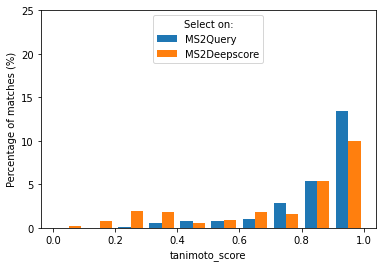

In [378]:
# plot_tanimoto_score_distribution_for_ms2query_cut_offs(ms2query_and_tanimoto, [0,0.5,0.6,0.7,0.8,0.9], "Minimal MS2Query score")
# plot_tanimoto_score_distribution_for_ms2query_cut_offs(ms2ds_and_tanimoto, [0,0.8,0.9,0.95, 0.97, 0.99], "Minimal MS2Deepscore")
# plot_tanimoto_score_distribution_for_ms2query_cut_offs(ms2query_and_tanimoto, [0.753], "Minimal MS2Query score")
# plot_tanimoto_score_distribution_for_ms2query_cut_offs(ms2ds_and_tanimoto, [0.9415], "Minimal MS2Deepscore")
# plot_tanimoto_score_distribution_for_ms2query_cut_offs(ms2query_and_tanimoto, [0.903], "Minimal MS2Query score")
# plot_tanimoto_score_distribution_for_ms2query_cut_offs(ms2ds_and_tanimoto, [0.9745], "Minimal MS2Deepscore")
# compare_tanimoto_score_distribution(ms2query_and_tanimoto, ms2ds_and_tanimoto, 0.753, 0.9415)
compare_tanimoto_score_distribution(ms2query_and_tanimoto, ms2ds_and_tanimoto, 0.903, 0.9745)

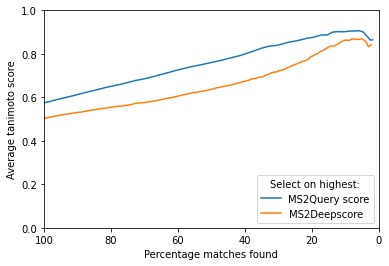

In [221]:
avg_tanimoto_vs_percentage_found(ms2query_and_tanimoto, 1.1, 100, "MS2Query score")
avg_tanimoto_vs_percentage_found(ms2query_and_tanimoto_selected_on_ms2ds, 1, 1000, "MS2Deepscore")
